In [1]:
import pandas as pd

# Load the dataset
file_path = 'INF2178_A3_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its info to understand the dataset structure
df_info = df.info()
df_head = df.head()

df_info, df_head

# Descriptive statistics for numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB
       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.07369

In [2]:
# data clean
# Step 1: Check for duplicate records
duplicates = df.duplicated().sum()

# Step 2: Remove 'incomeinthousands' as it seems to be redundant with 'totalhouseholdincome' which is more precise
# (We'll assume 'totalhouseholdincome' is the more accurate column for total income in whole dollars)
df_cleaned = df.drop(columns=['incomeinthousands'])

# Dropping the '_id' and 'LOC_ID' columns
summary_stats = df_cleaned.drop(columns=['totalhouseholdincome','incomegroup']).describe()

# Printing the summary statistics
print(summary_stats)


# Step 3: Basic outlier detection for the score columns using IQR method
Q1 = df_cleaned[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']].quantile(0.25)
Q3 = df_cleaned[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on being outside of 1.5 * IQR from the Q1 and Q3
outliers = ((df_cleaned[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                         'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']] < (Q1 - 1.5 * IQR)) |
            (df_cleaned[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
                         'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']] > (Q3 + 1.5 * IQR))).sum()

duplicates, outliers


       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  
count        11933.000000     11933.000000                 11933.000000  
mean            47.511178        37.799461                    28.235584  
std             14.327111        12.027753                     7.577457  
min             22.350000        11.900000                     7.858000  
25%     

(0,
 fallreadingscore               373
 fallmathscore                  333
 fallgeneralknowledgescore        8
 springreadingscore             642
 springmathscore                275
 springgeneralknowledgescore      0
 dtype: int64)

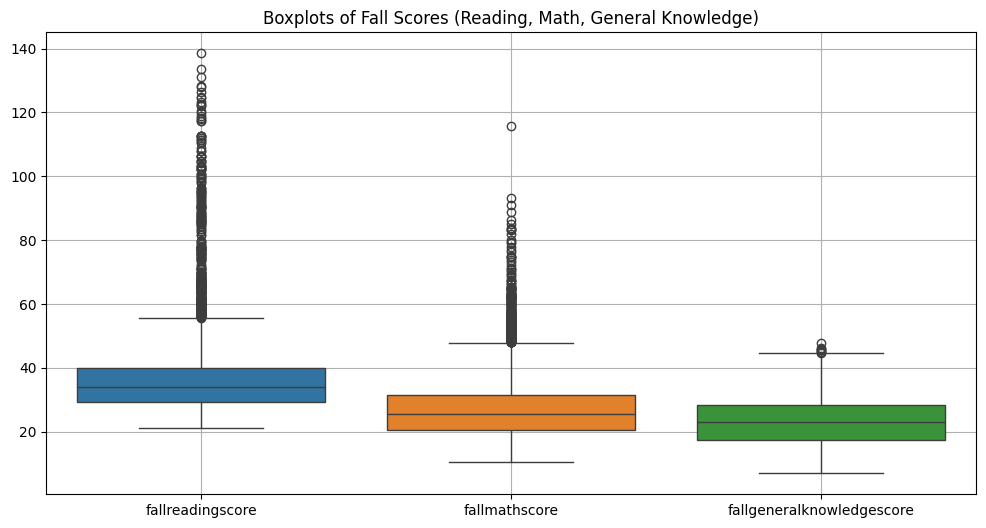

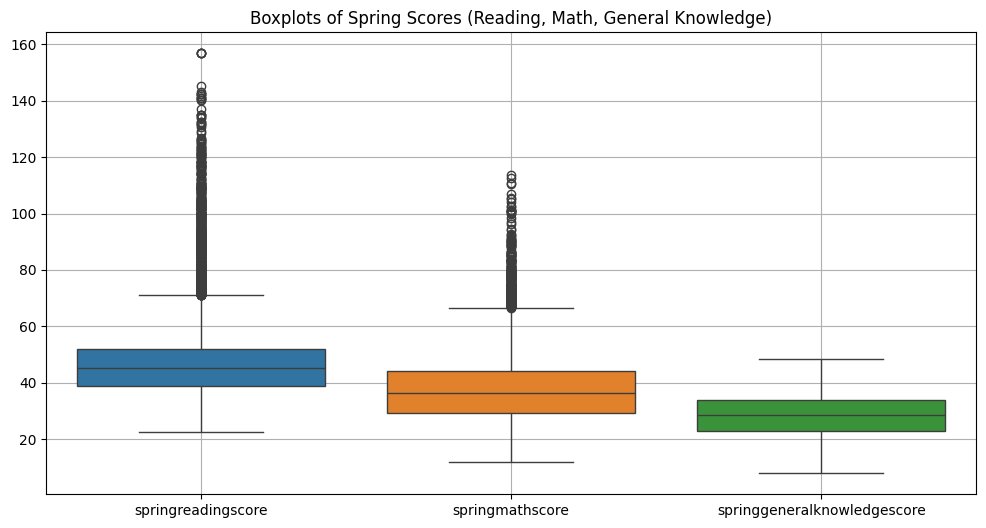

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create boxplots for the scores
def plot_boxplots(df, columns, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[columns])
    plt.title(title)
    plt.grid(True)
    plt.show()

# Boxplots for Fall Scores
plot_boxplots(df_cleaned, ['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore'],
              'Boxplots of Fall Scores (Reading, Math, General Knowledge)')

# Boxplots for Spring Scores
plot_boxplots(df_cleaned, ['springreadingscore', 'springmathscore', 'springgeneralknowledgescore'],
              'Boxplots of Spring Scores (Reading, Math, General Knowledge)')


In [5]:
# Feature Engineering: Calculate the score differences from Fall to Spring
df_cleaned['reading_score_diff'] = df_cleaned['springreadingscore'] - df_cleaned['fallreadingscore']
df_cleaned['math_score_diff'] = df_cleaned['springmathscore'] - df_cleaned['fallmathscore']
df_cleaned['generalknowledge_score_diff'] = df_cleaned['springgeneralknowledgescore'] - df_cleaned['fallgeneralknowledgescore']

# Calculate descriptive statistics for the new features
descriptive_stats_diff = df_cleaned[['reading_score_diff', 'math_score_diff', 'generalknowledge_score_diff']].describe()

# Display the descriptive statistics for the new features
descriptive_stats_diff.transpose()


,count,mean,std,min,25%,50%,75%,max
reading_score_diff,11933.0,11.556963,8.085004,-44.760,6.470,10.400,15.150,91.940
math_score_diff,11933.0,10.671218,6.855263,-22.160,6.010,9.860,14.330,75.350
generalknowledge_score_diff,11933.0,5.161890,4.054906,-14.183,2.472,5.047,7.781,27.785


In [6]:


# Calculating correlation matrix for the scores and household income
correlation_matrix = df_cleaned[['totalhouseholdincome','incomegroup','reading_score_diff', 'math_score_diff', 'generalknowledge_score_diff']].corr()

# Prepare data for correlation matrix output

descriptive_stats_correlation = correlation_matrix

descriptive_stats_correlation


,totalhouseholdincome,incomegroup,reading_score_diff,math_score_diff,generalknowledge_score_diff
totalhouseholdincome,1.000000,0.875993,0.081160,0.104170,0.004553
incomegroup,0.875993,1.000000,0.073369,0.087706,0.000740
reading_score_diff,0.081160,0.073369,1.000000,0.306323,0.119307
math_score_diff,0.104170,0.087706,0.306323,1.000000,0.146702
generalknowledge_score_diff,0.004553,0.000740,0.119307,0.146702,1.000000


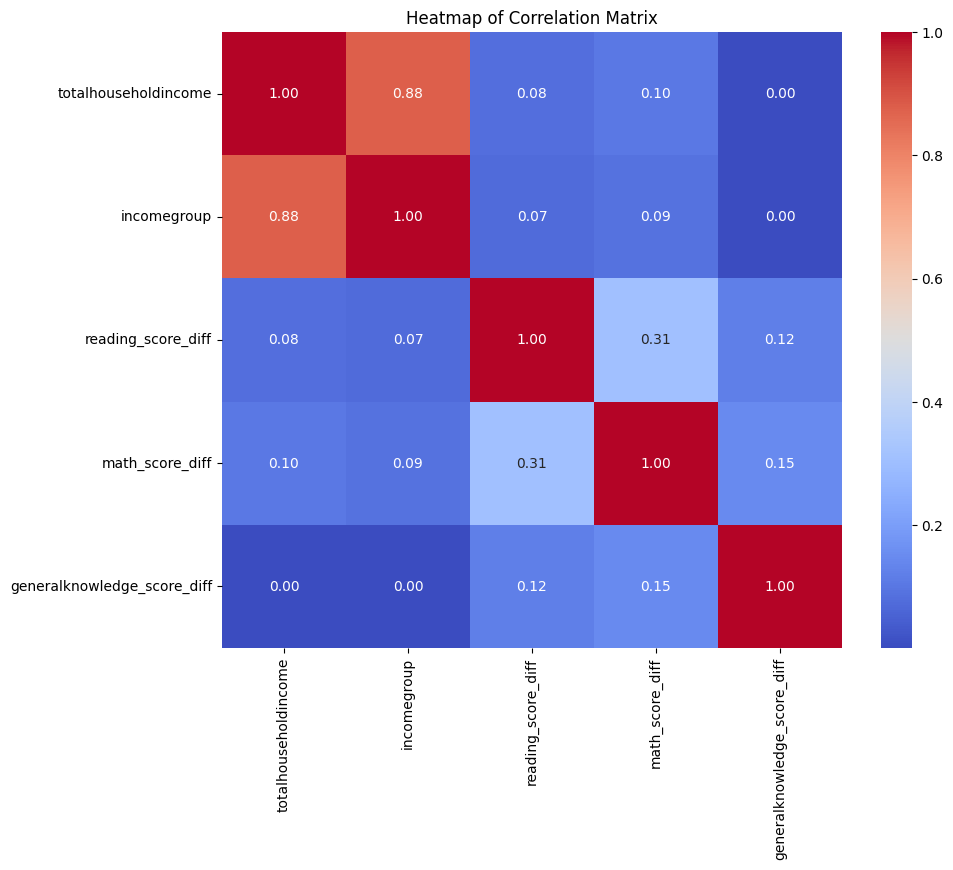

In [ ]:
# Now, we'll create a heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(descriptive_stats_correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

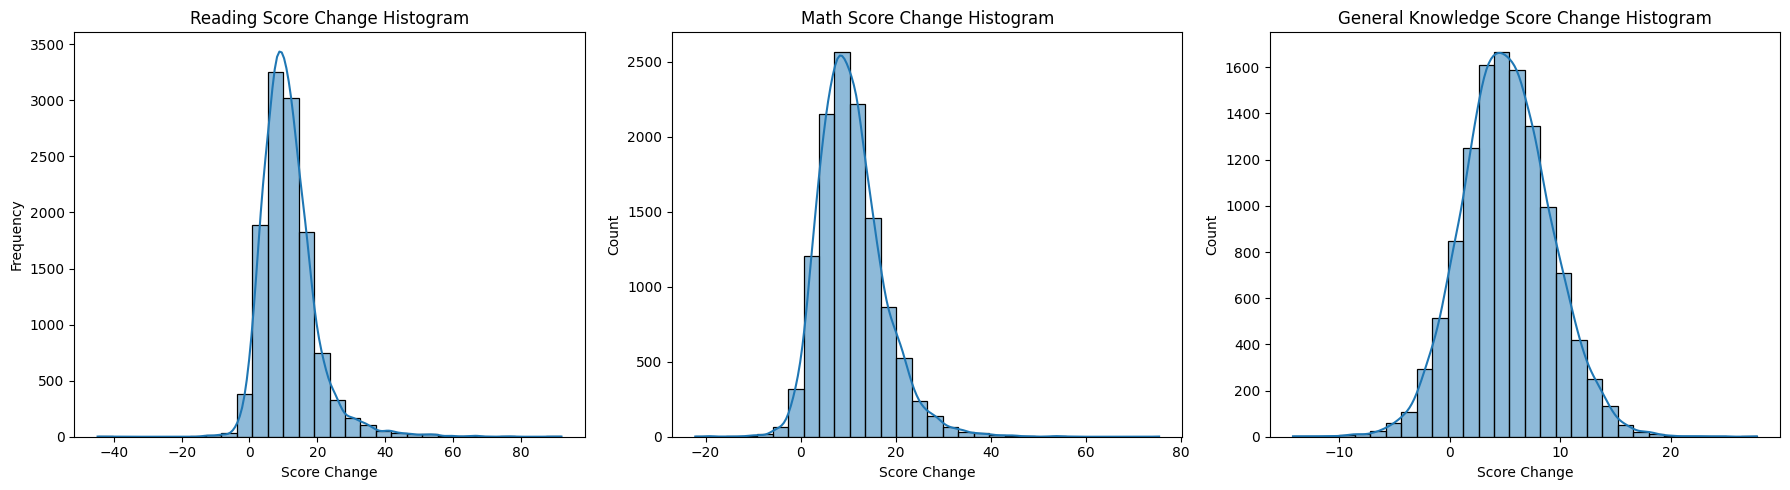

In [ ]:
# Plotting histograms for the changes in scores from Fall to Spring
plt.figure(figsize=(18, 5))

# Reading score difference histogram
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['reading_score_diff'], bins=30, kde=True)
plt.title('Reading Score Change Histogram')
plt.xlabel('Score Change')
plt.ylabel('Frequency')

# Math score difference histogram
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned['math_score_diff'], bins=30, kde=True)
plt.title('Math Score Change Histogram')
plt.xlabel('Score Change')

# General knowledge score difference histogram
plt.subplot(1, 3, 3)
sns.histplot(df_cleaned['generalknowledge_score_diff'], bins=30, kde=True)
plt.title('General Knowledge Score Change Histogram')
plt.xlabel('Score Change')

plt.tight_layout()
plt.show()


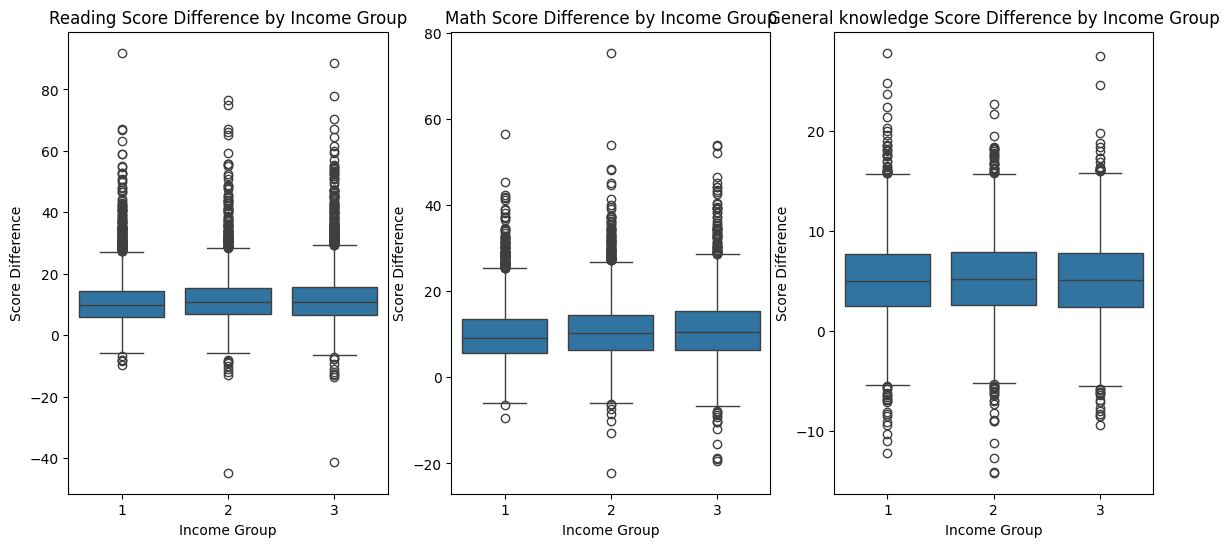

In [ ]:
# Let's try plotting the distribution of score differences across different income groups again.
# Starting with boxplots for the reading and math score differences by income group.

plt.figure(figsize=(14, 6))

# Reading score difference by income group
plt.subplot(1, 3, 1)
sns.boxplot(x='incomegroup', y='reading_score_diff', data=df_cleaned)
plt.title('Reading Score Difference by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score Difference')

# Math score difference by income group
plt.subplot(1, 3, 2)
sns.boxplot(x='incomegroup', y='math_score_diff', data=df_cleaned)
plt.title('Math Score Difference by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score Difference')

# General knowledge difference by income group
plt.subplot(1, 3, 3)
sns.boxplot(x='incomegroup', y='generalknowledge_score_diff', data=df_cleaned)
plt.title('General knowledge Score Difference by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score Difference')

plt.show()


In [7]:
# **Exploratory Data Analysis (EDA)**:
import pandas as pd

# Assuming df_cleaned is your DataFrame with all the necessary columns

# Aggregate the average score differences by income group
average_score_diff_by_income = df_cleaned.groupby('incomegroup')[['reading_score_diff', 'math_score_diff', 'generalknowledge_score_diff']].mean()

# Reset the index to make 'incomegroup' a column again, useful for subsequent plotting
average_score_diff_by_income = average_score_diff_by_income.reset_index()

print(average_score_diff_by_income)


   incomegroup  reading_score_diff  math_score_diff  \
0            1           10.878279         9.958547   
1            2           11.716932        10.896224   
2            3           12.308387        11.399178   

   generalknowledge_score_diff  
0                     5.121809  
1                     5.255720  
2                     5.115866  


<ipython-input-8-9f6f01a3d6ca>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='incomegroup', y='reading_score_diff', data=average_score_diff_by_income, palette='coolwarm')
<ipython-input-8-9f6f01a3d6ca>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='incomegroup', y='math_score_diff', data=average_score_diff_by_income, palette='coolwarm')
<ipython-input-8-9f6f01a3d6ca>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='incomegroup', y='generalknowledge_score_diff', data=average_score_diff_by_income, palette='coolwarm')


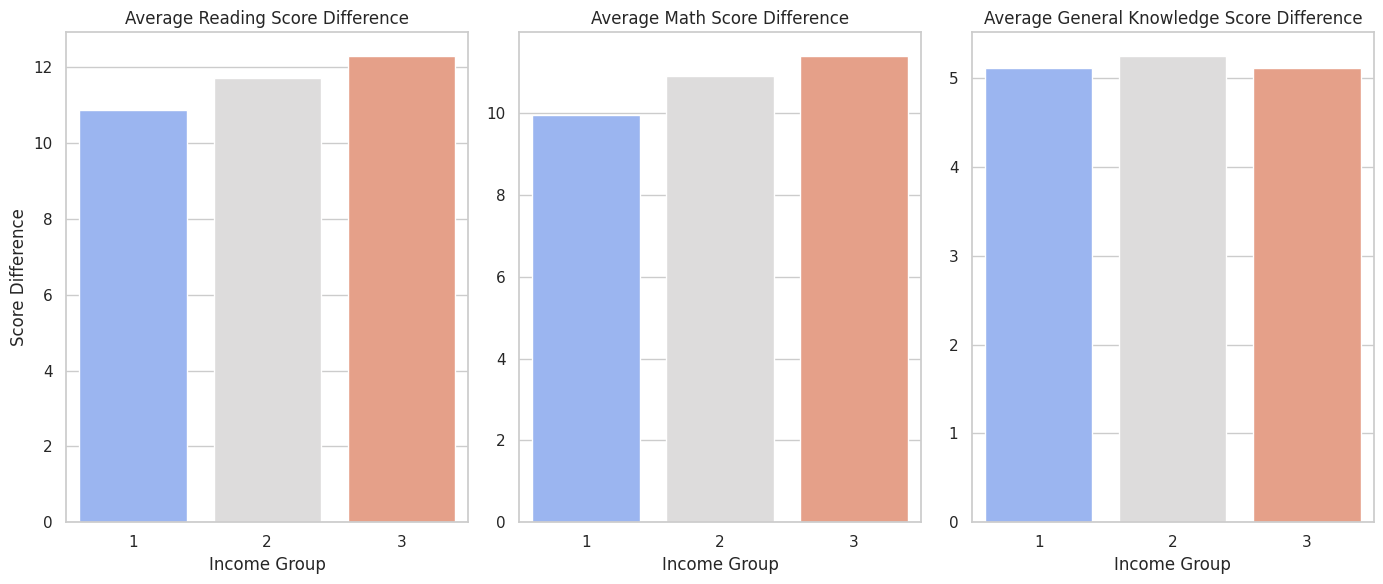

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 6))

# Plot for Reading Score Difference
plt.subplot(1, 3, 1)
sns.barplot(x='incomegroup', y='reading_score_diff', data=average_score_diff_by_income, palette='coolwarm')
plt.title('Average Reading Score Difference')
plt.xlabel('Income Group')
plt.ylabel('Score Difference')

# Plot for Math Score Difference
plt.subplot(1, 3, 2)
sns.barplot(x='incomegroup', y='math_score_diff', data=average_score_diff_by_income, palette='coolwarm')
plt.title('Average Math Score Difference')
plt.xlabel('Income Group')
plt.ylabel('')

# Plot for General Knowledge Score Difference
plt.subplot(1, 3, 3)
sns.barplot(x='incomegroup', y='generalknowledge_score_diff', data=average_score_diff_by_income, palette='coolwarm')
plt.title('Average General Knowledge Score Difference')
plt.xlabel('Income Group')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [11]:
# How does household income affect the progression of students' academic performance in kindergarten?
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare a DataFrame for ANCOVA with the necessary columns
df_for_ANCOVA = df_cleaned[['fallreadingscore', 'fallmathscore', 'incomegroup', 'reading_score_diff', 'math_score_diff']].copy()

# Get dummy variables for incomegroup to use in the regression model
income_dummies = pd.get_dummies(df_for_ANCOVA['incomegroup'], prefix='incomegroup')
df_for_ANCOVA = pd.concat([df_for_ANCOVA, income_dummies], axis=1)

# ANCOVA Model for Reading Score Growth
reading_model = ols('reading_score_diff ~ fallreadingscore + incomegroup_2 + incomegroup_3', data=df_for_ANCOVA).fit()

# ANCOVA Model for Math Score Growth
math_model = ols('math_score_diff ~ fallmathscore + incomegroup_2 + incomegroup_3', data=df_for_ANCOVA).fit()

# Let's get the summary of both models
reading_summary = reading_model.summary()
math_summary = math_model.summary()

reading_summary.tables[1], math_summary.tables[1]
# print summary
reading_summary = reading_model.summary()
math_summary = math_model.summary()


print("Reading Score Growth ANCOVA Model:")
print(reading_summary.tables[1])
print("\nMath Score Growth ANCOVA Model:")
print(math_summary.tables[1])



Reading Score Growth ANCOVA Model:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5430      0.264     24.779      0.000       6.025       7.061
fallreadingscore     0.1322      0.007     18.263      0.000       0.118       0.146
incomegroup_2        0.3751      0.176      2.130      0.033       0.030       0.720
incomegroup_3        0.4898      0.185      2.648      0.008       0.127       0.852

Math Score Growth ANCOVA Model:
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2011      0.199     41.273      0.000       7.812       8.591
fallmathscore     0.0735      0.007     10.197      0.000       0.059       0.088
incomegroup_2     0.6700      0.151      4.430      0.000       0.374       0.966
incomegroup_

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df_cleaned is your DataFrame with the necessary data

# Prepare a DataFrame for ANCOVA with the necessary columns
df_for_ANCOVA = df_cleaned[['fallreadingscore', 'fallmathscore', 'incomegroup', 'reading_score_diff', 'math_score_diff']].copy()

# Get dummy variables for incomegroup to use in the regression model
income_dummies = pd.get_dummies(df_for_ANCOVA['incomegroup'], prefix='incomegroup', drop_first=True)
df_for_ANCOVA = pd.concat([df_for_ANCOVA, income_dummies], axis=1)

# Correct ANCOVA Model formulation for Reading Score Growth
reading_model = ols('reading_score_diff ~ fallreadingscore + incomegroup_2 + incomegroup_3', data=df_for_ANCOVA).fit()

# Correct ANCOVA Model for Math Score Growth
math_model = ols('math_score_diff ~ fallmathscore + incomegroup_2 + incomegroup_3', data=df_for_ANCOVA).fit()

# Simplified summary printout
print("Reading Score Growth ANCOVA Model Summary:")
print(reading_model.summary().tables[1])

print("\nMath Score Growth ANCOVA Model Summary:")
print(math_model.summary().tables[1])

# Corrected Interaction Models
reading_interaction_model = ols('reading_score_diff ~ fallreadingscore * (incomegroup_2 + incomegroup_3)', data=df_for_ANCOVA).fit()
math_interaction_model = ols('math_score_diff ~ fallmathscore * (incomegroup_2 + incomegroup_3)', data=df_for_ANCOVA).fit()

# Printing summaries of interaction models
print("\nReading Score Interaction Model Summary:")
print(reading_interaction_model.summary())

print("\nMath Score Interaction Model Summary:")
print(math_interaction_model.summary())


Reading Score Growth ANCOVA Model Summary:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5430      0.264     24.779      0.000       6.025       7.061
fallreadingscore     0.1322      0.007     18.263      0.000       0.118       0.146
incomegroup_2        0.3751      0.176      2.130      0.033       0.030       0.720
incomegroup_3        0.4898      0.185      2.648      0.008       0.127       0.852

Math Score Growth ANCOVA Model Summary:
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2011      0.199     41.273      0.000       7.812       8.591
fallmathscore     0.0735      0.007     10.197      0.000       0.059       0.088
incomegroup_2     0.6700      0.151      4.430      0.000       0.374       0.

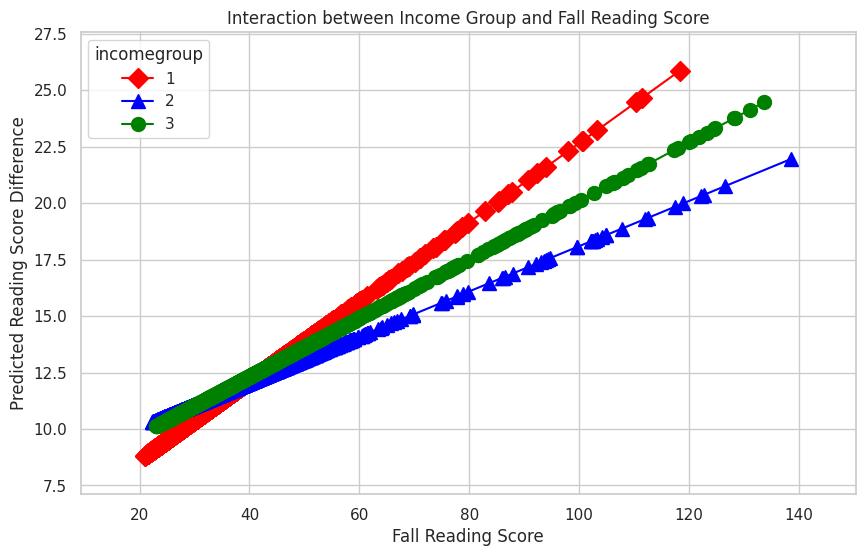

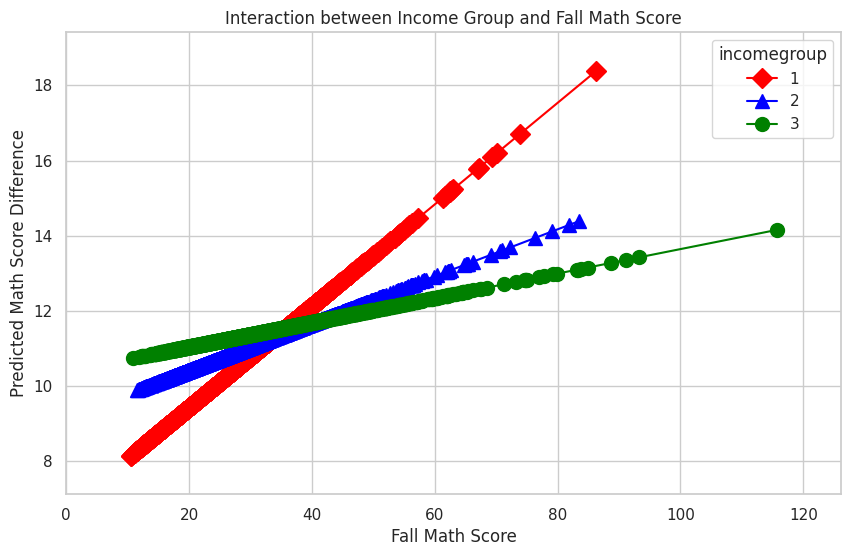

In [18]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Assuming 'df_for_ANCOVA' contains your relevant data and models are named 'reading_interaction_model' and 'math_interaction_model'

# Add fitted values for both reading and math models to the DataFrame
df_for_ANCOVA['reading_fitted_values'] = reading_interaction_model.fittedvalues
df_for_ANCOVA['math_fitted_values'] = math_interaction_model.fittedvalues

# Reading Score Interaction Plot
fig, ax = plt.subplots(figsize=(10, 6))
interaction_plot(x=df_for_ANCOVA['fallreadingscore'], trace=df_for_ANCOVA['incomegroup'],
                 response=df_for_ANCOVA['reading_fitted_values'],
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10, ax=ax)
ax.set_xlabel('Fall Reading Score')
ax.set_ylabel('Predicted Reading Score Difference')
ax.set_title('Interaction between Income Group and Fall Reading Score')
plt.show()

# Math Score Interaction Plot
fig, ax = plt.subplots(figsize=(10, 6))
interaction_plot(x=df_for_ANCOVA['fallmathscore'], trace=df_for_ANCOVA['incomegroup'],
                 response=df_for_ANCOVA['math_fitted_values'],
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=10, ax=ax)
ax.set_xlabel('Fall Math Score')
ax.set_ylabel('Predicted Math Score Difference')
ax.set_title('Interaction between Income Group and Fall Math Score')
plt.show()




In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Assuming 'df_cleaned' is your DataFrame with the necessary data
# and it includes 'generalknowledge_score_diff' along with 'reading_score_diff' and 'math_score_diff'

# ANCOVA Model for Reading Score Growth with General Knowledge Score Difference as a covariate
reading_ANCOVA_model = ols('reading_score_diff ~ generalknowledge_score_diff', data=df_cleaned).fit()

# ANCOVA Model for Math Score Growth with General Knowledge Score Difference as a covariate
math_ANCOVA_model = ols('math_score_diff ~ generalknowledge_score_diff', data=df_cleaned).fit()

# Print summaries for the reading and math models
print("Reading Score Growth ANCOVA Model:")
print(reading_ANCOVA_model.summary().tables[1])

print("\nMath Score Growth ANCOVA Model:")
print(math_ANCOVA_model.summary().tables[1])


Reading Score Growth ANCOVA Model:
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.3290      0.119     86.825      0.000      10.096      10.562
generalknowledge_score_diff     0.2379      0.018     13.126      0.000       0.202       0.273

Math Score Growth ANCOVA Model:
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       9.3910      0.100     93.446      0.000       9.194       9.588
generalknowledge_score_diff     0.2480      0.015     16.199      0.000       0.218       0.278


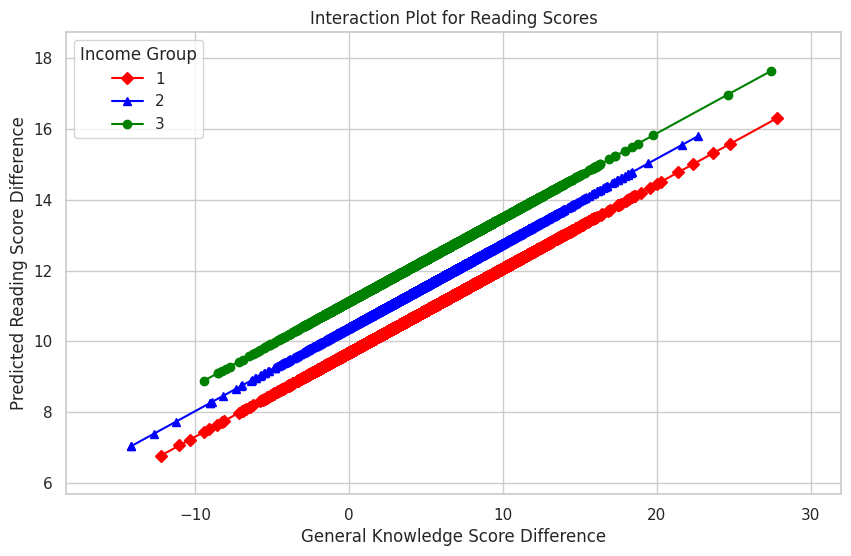

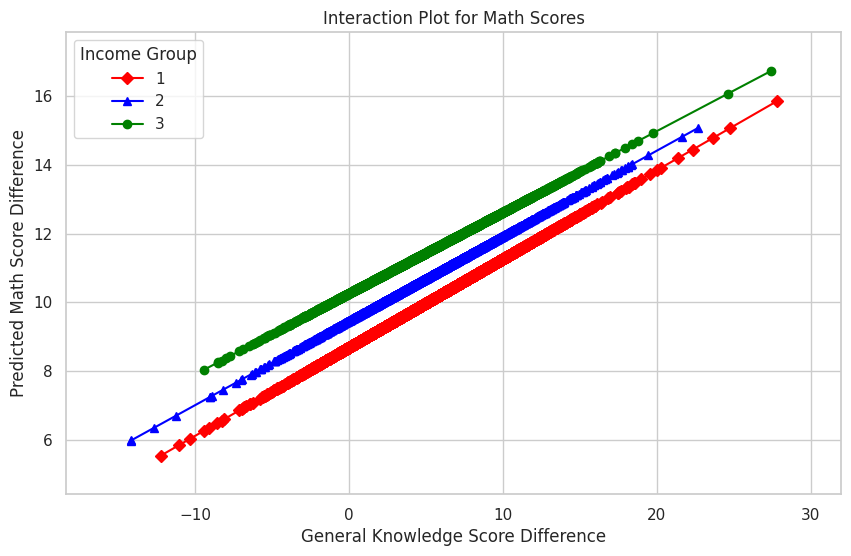

In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is your DataFrame and it includes 'generalknowledge_score_diff',
# 'incomegroup', 'reading_score_diff', and 'math_score_diff'

# Create interaction models for reading and math score growth
reading_interaction_model = ols('reading_score_diff ~ generalknowledge_score_diff * incomegroup', data=df_cleaned).fit()
math_interaction_model = ols('math_score_diff ~ generalknowledge_score_diff * incomegroup', data=df_cleaned).fit()

# Add the fitted values from the interaction models to the DataFrame for plotting
df_cleaned['reading_interaction_fitted_values'] = reading_interaction_model.fittedvalues
df_cleaned['math_interaction_fitted_values'] = math_interaction_model.fittedvalues

# Create interaction plot for Reading Scores
plt.figure(figsize=(10, 6))
interaction_plot(x=df_cleaned['generalknowledge_score_diff'], trace=df_cleaned['incomegroup'],
                 response=df_cleaned['reading_interaction_fitted_values'], colors=['red', 'blue', 'green'],
                 markers=['D', '^', 'o'], ax=plt.gca())
plt.xlabel('General Knowledge Score Difference')
plt.ylabel('Predicted Reading Score Difference')
plt.title('Interaction Plot for Reading Scores')
plt.legend(title='Income Group')
plt.show()

# Create interaction plot for Math Scores
plt.figure(figsize=(10, 6))
interaction_plot(x=df_cleaned['generalknowledge_score_diff'], trace=df_cleaned['incomegroup'],
                 response=df_cleaned['math_interaction_fitted_values'], colors=['red', 'blue', 'green'],
                 markers=['D', '^', 'o'], ax=plt.gca())
plt.xlabel('General Knowledge Score Difference')
plt.ylabel('Predicted Math Score Difference')
plt.title('Interaction Plot for Math Scores')
plt.legend(title='Income Group')
plt.show()
